In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/a1.zip -d /content/

Archive:  /content/drive/MyDrive/a1.zip
replace /content/a1/algae_data_11/Anabaena/ΓòÖ╧ÇΓò¿ΓòÜΓòÿ╧â_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
pip install split-folders


In [13]:
import splitfolders

# Input dataset path and output folder
input_folder = "/content/a1/algae_data_11"
output_folder = "/content/output"

# Split data: 70% train, 20% validation, 10% test
splitfolders.ratio(input_folder, output=output_folder,
                   seed=42, ratio=(0.8, 0.1, 0.1))


Copying files: 1650 files [00:00, 3983.95 files/s]


In [14]:
import tensorflow as tf

# Set paths for train, validation, and test directories
train_dir = "output/train"
val_dir = "output/val"
test_dir = "output/test"

# Image parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 8

# Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE, label_mode='categorical')

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE, label_mode='categorical')

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE, label_mode='categorical')


Found 1320 files belonging to 11 classes.
Found 330 files belonging to 11 classes.
Found 165 files belonging to 11 classes.


In [15]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load the ResNet-50 model with pre-trained ImageNet weights, excluding the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers to prevent them from being trained initially
base_model.trainable = False

# Build the full model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(len(train_ds.class_names), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=25)

# Unfreeze some layers for fine-tuning
base_model.trainable = True

# Re-compile with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])




Epoch 1/25
165/165 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.5611 - loss: 1.4446 - val_accuracy: 0.9000 - val_loss: 0.3040
Epoch 2/25
165/165 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.9454 - loss: 0.2145 - val_accuracy: 0.8970 - val_loss: 0.3099
Epoch 3/25
165/165 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.9651 - loss: 0.1275 - val_accuracy: 0.9424 - val_loss: 0.1598
Epoch 4/25
165/165 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9944 - loss: 0.0416 - val_accuracy: 0.9455 - val_loss: 0.1901
Epoch 5/25
165/165 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.9970 - loss: 0.0204 - val_accuracy: 0.9515 - val_loss: 0.1749
Epoch 6/25
165/165 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9992 - loss: 0.0113 - val_accuracy: 0.9455 - val_loss: 0.2330
Epoch 7/25
165/165 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.9948 - loss: 0.0222 - val_accuracy: 0.9636 - val_loss: 0.1717
Epoch 8/25
165/165 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9994 - loss: 0.0109 - val

In [16]:
# Fine-tune the model
model.fit(train_ds, validation_data=val_ds, epochs=50)

Epoch 1/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 78s 133ms/step - accuracy: 0.7057 - loss: 1.5509 - val_accuracy: 0.9576 - val_loss: 0.2084
Epoch 2/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 18s 108ms/step - accuracy: 0.9001 - loss: 0.3510 - val_accuracy: 0.9576 - val_loss: 0.2154
Epoch 3/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 20s 107ms/step - accuracy: 0.9179 - loss: 0.2549 - val_accuracy: 0.9606 - val_loss: 0.1901
Epoch 4/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.9533 - loss: 0.1428 - val_accuracy: 0.9636 - val_loss: 0.1845
Epoch 5/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 20s 106ms/step - accuracy: 0.9599 - loss: 0.1226 - val_accuracy: 0.9727 - val_loss: 0.1641
Epoch 6/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 21s 110ms/step - accuracy: 0.9717 - loss: 0.0816 - val_accuracy: 0.9758 - val_loss: 0.1386
Epoch 7/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 20s 110ms/step - accuracy: 0.9717 - loss: 0.0660 - val_accuracy: 0.9758 - val_loss: 0.1444
Epoch 8/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 22s 118ms/step - accuracy: 0.9759 - loss: 0

In [17]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get predictions on the test set
y_pred = []
y_true = []

for images, labels in test_ds:
    predictions = model.predict(images)
    y_pred.extend(tf.argmax(predictions, axis=1).numpy())
    y_true.extend(tf.argmax(labels, axis=1).numpy())


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.9439 - loss: 0.4352
Test Accuracy: 93.94%
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


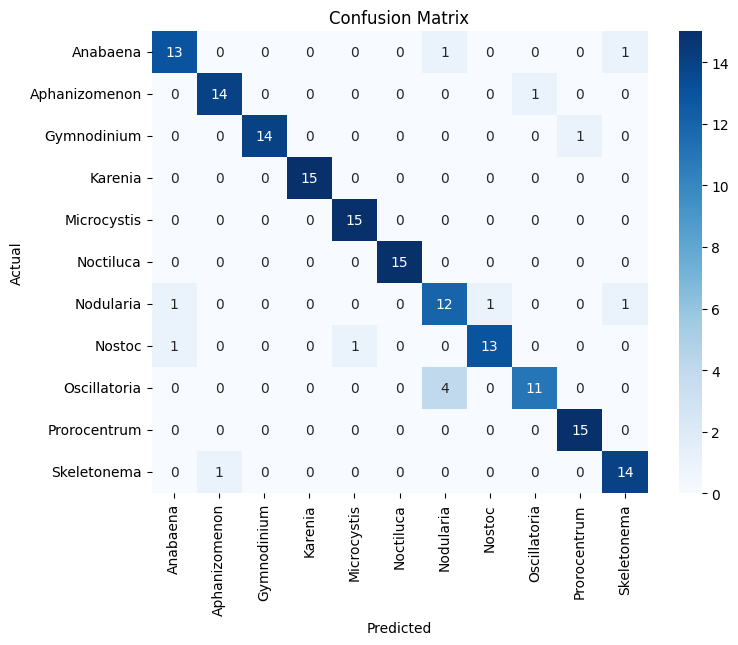

               precision    recall  f1-score   support

     Anabaena       0.87      0.87      0.87        15
Aphanizomenon       0.93      0.93      0.93        15
  Gymnodinium       1.00      0.93      0.97        15
      Karenia       1.00      1.00      1.00        15
  Microcystis       0.94      1.00      0.97        15
    Noctiluca       1.00      1.00      1.00        15
    Nodularia       0.71      0.80      0.75        15
       Nostoc       0.93      0.87      0.90        15
 Oscillatoria       0.92      0.73      0.81        15
 Prorocentrum       0.94      1.00      0.97        15
  Skeletonema       0.88      0.93      0.90        15

     accuracy                           0.92       165
    macro avg       0.92      0.92      0.92       165
 weighted avg       0.92      0.92      0.92       165



In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_names = test_ds.class_names

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))
